<a href="https://colab.research.google.com/github/sgadkar2/machine-learning-algorithms/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

### **Generating Input**

In [ ]:
petal_length = torch.tensor([1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,
                             1.7,1.5,1.7,1.5,1,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,
                             1.5,1.3,1.5,1.3,1.3,1.3,1.6,1.9,1.4,1.6,1.4,1.5,1.4,4.7,4.5,4.9,4,4.6,4.5,
                             4.7,3.3,4.6,3.9,3.5,4.2,4,4.7,3.6,4.4,4.5,4.1,4.5,3.9,4.8,4,4.9,4.7,4.3,4.4,
                             4.8,5,4.5,3.5,3.8,3.7,3.9,5.1,4.5,4.5,4.7,4.4,4.1,4,4.4,4.6,4,3.3,4.2,4.2,4.2,4.3,3,4.1])

petal_width = torch.tensor([0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3,0.2,0.4,0.2,
                            0.5,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,0.1,0.2,0.1,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0.2,0.6,0.4,0.3,
                            0.2,0.2,0.2,0.2,1.4,1.5,1.5,1.3,1.5,1.3,1.6,1,1.3,1.4,1,1.5,1,1.4,1.3,1.4,1.5,1,1.5,1.1,1.8,
                            1.3,1.5,1.2,1.3,1.4,1.4,1.7,1.5,1,1.1,1,1.2,1.6,1.5,1.6,1.5,1.3,1.3,1.3,1.2,1.4,1.2,1,1.3,1.2,1.3,1.3,1.1,1.3])

petal_dimensions = torch.column_stack((petal_length, petal_width))

flower_type = torch.tensor([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])


### **Plotting graph of petal length and petal width for iris-versicolor and iris-setosa flowers**

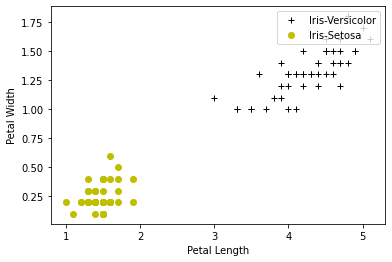

In [ ]:
positive = flower_type == 1
negative = flower_type == 0

plt.plot(petal_dimensions[positive, 0], petal_dimensions[positive, 1], 'k+', label='Iris-Versicolor')
plt.plot(petal_dimensions[negative, 0], petal_dimensions[negative, 1], 'yo', label='Iris-Setosa')

plt.ylabel('Petal Width')
plt.xlabel('Petal Length')

plt.legend(loc="upper right")

plt.show()

### **Splitting data into 80:20 (80% training data and 20% test data)**

In [ ]:
index_set_1 = torch.arange(50)

train_size = int(0.8 * len(index_set_1))
test_size = len(index_set_1) - train_size

index_train, index_test = torch.utils.data.random_split(index_set_1, [train_size, test_size])

train_dataloader = torch.utils.data.DataLoader(index_train, shuffle=False, batch_size=8)
test_dataloader = torch.utils.data.DataLoader(index_test, shuffle=False, batch_size=8)

petal_dimensions_train = torch.Tensor([])
flower_type_train = torch.Tensor([])

for id in train_dataloader:
  petal_dimensions_train = torch.cat((petal_dimensions_train, petal_dimensions[id]), dim=0)
  flower_type_train = torch.cat((flower_type_train, flower_type[id]), dim=0)

petal_dimensions_test = torch.Tensor([])
flower_type_test = torch.Tensor([])

for id in test_dataloader:
  petal_dimensions_test = torch.cat((petal_dimensions_test, petal_dimensions[id]), dim=0)
  flower_type_test = torch.cat((flower_type_test, flower_type[id]), dim=0)

index_set_2 = torch.arange(50, 100)

index_train, index_test = torch.utils.data.random_split(index_set_2, [train_size, test_size])

train_dataloader = torch.utils.data.DataLoader(index_train, shuffle=False, batch_size=8)
test_dataloader = torch.utils.data.DataLoader(index_test, shuffle=False, batch_size=8)


for id in train_dataloader:
  petal_dimensions_train = torch.cat((petal_dimensions_train, petal_dimensions[id]), dim=0)
  flower_type_train = torch.cat((flower_type_train, flower_type[id]), dim=0)

for id in test_dataloader:
  petal_dimensions_test = torch.cat((petal_dimensions_test, petal_dimensions[id]), dim=0)
  flower_type_test = torch.cat((flower_type_test, flower_type[id]), dim=0)


In [ ]:
print("Following is the training data after split")
print(petal_dimensions_train)
print(flower_type_train)
print("Following is the test data after split")
print(petal_dimensions_test)
print(flower_type_test)

Following is the training data after split
tensor([[1.5000, 0.2000],
        [1.5000, 0.1000],
        [1.2000, 0.2000],
        [1.4000, 0.2000],
        [1.3000, 0.2000],
        [1.2000, 0.2000],
        [1.7000, 0.3000],
        [1.6000, 0.4000],
        [1.3000, 0.3000],
        [1.1000, 0.1000],
        [1.4000, 0.2000],
        [1.0000, 0.2000],
        [1.6000, 0.6000],
        [1.5000, 0.4000],
        [1.6000, 0.2000],
        [1.4000, 0.3000],
        [1.6000, 0.2000],
        [1.7000, 0.4000],
        [1.6000, 0.2000],
        [1.3000, 0.2000],
        [1.5000, 0.2000],
        [1.5000, 0.1000],
        [1.4000, 0.2000],
        [1.4000, 0.3000],
        [1.4000, 0.2000],
        [1.3000, 0.4000],
        [1.5000, 0.1000],
        [1.4000, 0.2000],
        [1.7000, 0.5000],
        [1.3000, 0.2000],
        [1.3000, 0.3000],
        [1.5000, 0.3000],
        [1.5000, 0.2000],
        [1.5000, 0.2000],
        [1.7000, 0.2000],
        [1.4000, 0.2000],
        [1.9000, 0.20

### **Computing Output**

In [ ]:
def compute_output(x1, x2, b_0, b_1, b_2):
  output = b_0 + torch.mul(x1, b_1) + torch.mul(x2, b_2)
  return 1/(1 + np.exp(-output))

### **Computing total loss**

In [ ]:
def compute_loss(x, y, prediction):

  loss = 0

  for i in range(len(y)):
    loss = loss + ((y[i] - prediction[i]) * prediction[i] * (1 - prediction[i]) * x[i])

  return loss

### **Computing Gradient descent**

In [ ]:
def gradient_descent(x, y, b_0, b_1, b_2, alpha):
  iterations = 100
  #total_loss = np.empty(100)
  m, n = x.shape
  prediction = np.empty(m)
  predicted_result = np.empty(m)
  accuracy = np.empty(iterations)
  bias_x = np.ones(m)

  for i in range(iterations):

    for j in range(m):
      prediction[j] = compute_output(x[j][0], x[j][1], b_0, b_1, b_2)

      if prediction[j] >= 0.5:
        predicted_result[j] = 1
      else:
        predicted_result[j] = 0

    correct_predictions = 0
    for k in range(m):
       if predicted_result[k] == y[k]:
          correct_predictions += 1

    accuracy[i] = (correct_predictions * 100) / len(predicted_result)
    print(f"After Iteration {i+1} Accuracy is {accuracy[i]}")

    #updating weigths
    b_0 += alpha * compute_loss(bias_x, y, prediction)
    b_1 += alpha * compute_loss(x[:, 0], y, prediction)
    b_2 += alpha * compute_loss(x[:, 1], y, prediction)

  return accuracy, prediction, b_0, b_1, b_2

### **Running Logistic regression model**

In [ ]:
b_0 = 0.4
b_1 = 0.4
b_2 = 0.4
alpha = 0.009
accuracy = np.empty(100)

accuracy, prediction, b_0, b_1, b_2 = gradient_descent(petal_dimensions_train, flower_type_train, b_0, b_1, b_2, alpha)

After Iteration 1 Accuracy is 50.0
After Iteration 2 Accuracy is 50.0
After Iteration 3 Accuracy is 50.0
After Iteration 4 Accuracy is 50.0
After Iteration 5 Accuracy is 50.0
After Iteration 6 Accuracy is 50.0
After Iteration 7 Accuracy is 50.0
After Iteration 8 Accuracy is 50.0
After Iteration 9 Accuracy is 50.0
After Iteration 10 Accuracy is 50.0
After Iteration 11 Accuracy is 50.0
After Iteration 12 Accuracy is 50.0
After Iteration 13 Accuracy is 50.0
After Iteration 14 Accuracy is 50.0
After Iteration 15 Accuracy is 50.0
After Iteration 16 Accuracy is 50.0
After Iteration 17 Accuracy is 50.0
After Iteration 18 Accuracy is 51.25
After Iteration 19 Accuracy is 52.5
After Iteration 20 Accuracy is 53.75
After Iteration 21 Accuracy is 60.0
After Iteration 22 Accuracy is 72.5
After Iteration 23 Accuracy is 78.75
After Iteration 24 Accuracy is 85.0
After Iteration 25 Accuracy is 88.75
After Iteration 26 Accuracy is 90.0
After Iteration 27 Accuracy is 91.25
After Iteration 28 Accuracy is 9

### **Plotting graph of iteration and accuracy during training**

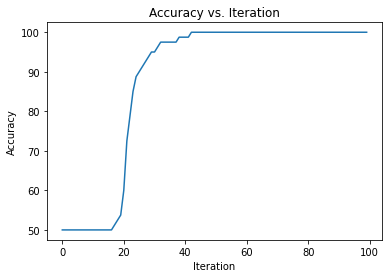

In [ ]:
plt.plot(np.arange(0,100), accuracy[0:100])
plt.title("Accuracy vs. Iteration");
plt.ylabel('Accuracy')
plt.xlabel('Iteration')

plt.show()

In [ ]:
print(f"Weights after training are : b0 = {b_0}, b1 = {b_1} and b2 = {b_2}")

Weights after training are : b0 = -1.8773757219314575, b1 = 0.4723779857158661 and b2 = 1.1501737833023071


### **Testing the trained model on test data**

In [ ]:
m, n = petal_dimensions_test.shape
predicted_result = np.empty(m)
for j in range(m):
    prediction[j] = compute_output(petal_dimensions_test[j][0], petal_dimensions_test[j][1], b_0, b_1, b_2)

    if prediction[j] >= 0.5:
      predicted_result[j] = 1
    else:
      predicted_result[j] = 0

correct_predictions = 0
for k in range(m):
  if predicted_result[k] == flower_type_test[k]:
    correct_predictions += 1

accuracy = (correct_predictions * 100) / len(predicted_result)
print(f"The Accuracy for test data is {accuracy}")

The Accuracy for test data is 100.0
